In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [32]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

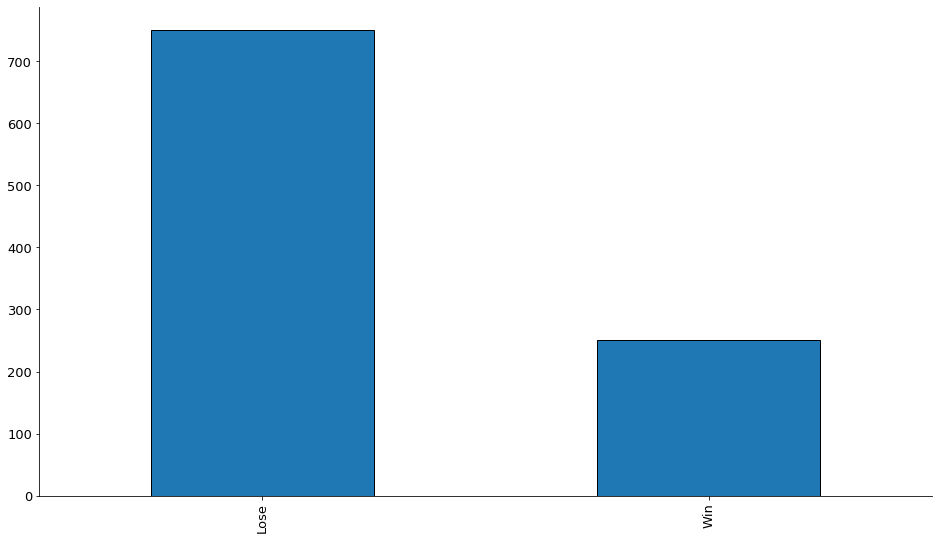

In [34]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()

In [26]:
n = 25
tickets.sample(n).mean()

0.24

In [28]:
[tickets.sample(n).mean() for _ in range(5)]

[0.32, 0.4, 0.4, 0.4, 0.2]

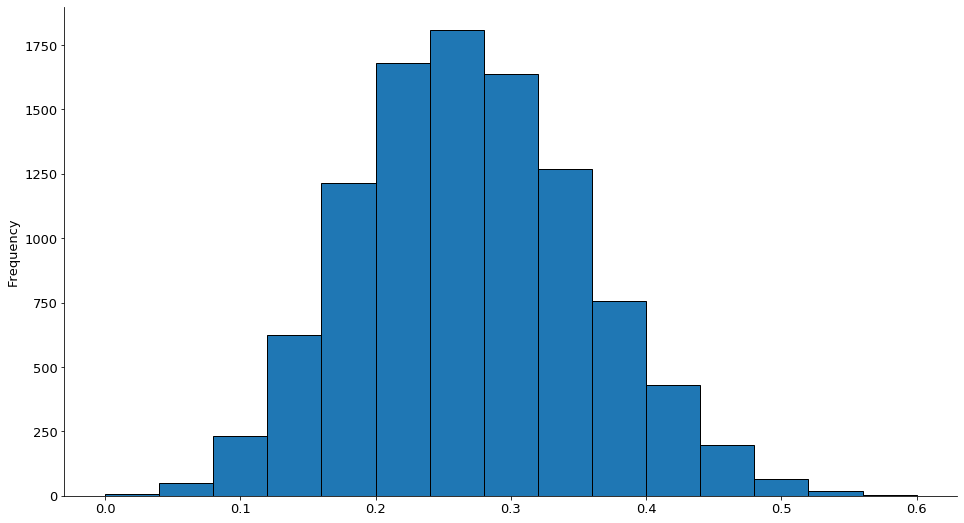

In [38]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10000)])
calculated_winrates.plot.hist(bins=15)

### Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls

The average value for an individual 6 sided die is 3.5 so the average of 6 dice rolls should be 3.5

### Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.


In [46]:
die = pd.Series([1, 2, 3, 4, 5, 6])
die.sample(1).sum()

1

In [63]:
def dice_roll():
    return pd.Series([die.sample(1).sum() for _ in range(6)])

In [64]:
dice_roll()

0    2
1    5
2    3
3    6
4    1
5    5
dtype: int64

In [ ]:
calculated_rolls = pd.Series([dice_roll().mean() for _ in range(10000)])

### Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)

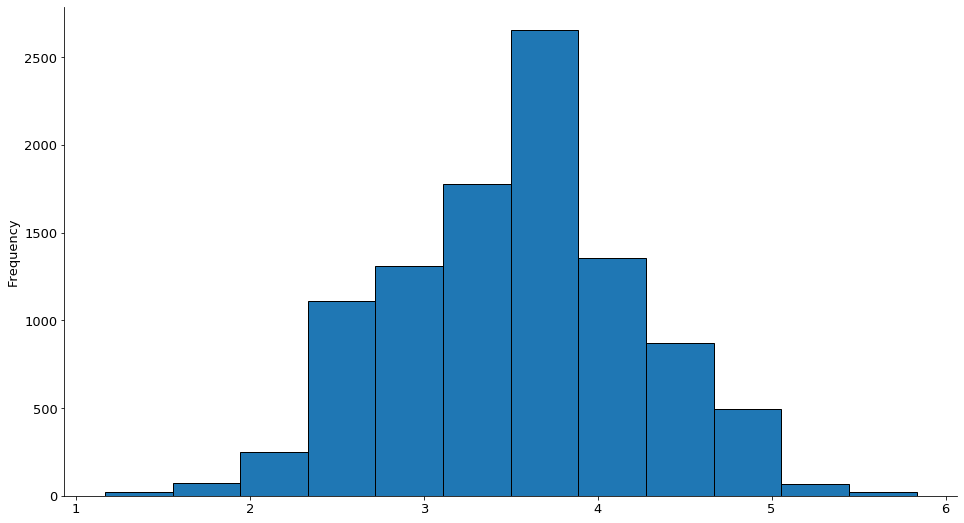

In [81]:
calculated_rolls.plot.hist(bins=12)
# The distribution of one dice roll is a uniform distribution.
# The chart appears to have more of a normal distribution.

### One classroom calculates their winrate at 20% and claims the tickets were distributed unfairly. What is the likelihood we observe a 20% (or smaller) winrate just due to chance?

In [84]:
se = math.sqrt((.25 * .75) / n)
print(se)
print(calculated_winrates.std())

0.08660254037844387
0.08556033562991155


In [85]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

In [86]:
stats.norm(mean, sd).cdf(.2)

0.2793555809916071

### For each of the following scenarios: refine the question, generate a null and alternative hypothesis, and give examples of true positives, true negatives, type I and type II errors.

Are the average grades in web development vs data science classes different?

In [87]:
# null hypothesis: The average grades in web development vs data science are not different
# alternative hypothesis: Average grades in data science are higher than web dev
# true positive: Average grades in data science are higher than web dev
# false positive: We conclude the average grade in data science is higher than web dev when they are the same
# false negative: We conclude the average grades are the same despite the average grades being different
# true negative: We conclude the average grades are not different and in reality they are not different

Has the network latency gone up since we switched internet service providers?

In [ ]:
# null hypothesis: The network latency has not gone up since we switched service provider
# alternative hypothesis: The network latency has gone up since we switched service provider.
# true positive: We conclude the latency has gone up and it really has
# false positive: We conclude the latency has gone up when it really hasn't
# false negative: We conclude the latency hasn't gone up when it really has
# true negative: We conclude the latency hasn't gone up and it really hasn't

Is the website redesign any good?

In [ ]:
# null hypothesis: the website redisgn had no effect
# alternative hypothesis: people like the website redeisgn
# true positive: we conclude the redesign had an effect and it really did
# false positive: we conclude the latency